# Unit test for nmf with missing values

In [1]:
import numpy as np
import sklearn
import nmf_with_missing_values
import matplotlib.pyplot as plt

In [2]:
n, d, K = 100, 100, 5
D = np.maximum(np.random.normal(size = (n, K)),0)
A = np.maximum(np.random.normal(size = (K, d)),0)
X = D @ A + np.random.normal(0, .01, size = (n,d))
mask = np.random.choice([0, 1], p=[.9, .1], size = (n, d))
masked_X = X - 1000 * mask

In [3]:
N = 10
rel_error = np.zeros((N,))
for i in range(N):
    nmf = nmf_with_missing_values.nmf_with_missing_values(n_outer_loops = i+1, n_components = K, save_space = False)
    W = nmf.fit_transform(masked_X)
    H = nmf.components_
    X_guess = nmf.X_guess
    rel_error[i] = np.linalg.norm(X_guess - X) / np.linalg.norm(X)

Text(0,0.5,'imputing error')

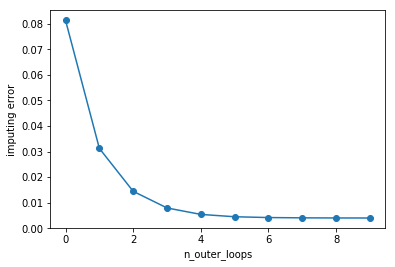

In [4]:
plt.plot(range(N), rel_error, marker = 'o')
plt.xlabel('n_outer_loops')
plt.ylabel('imputing error')

In [6]:
nmf.time

AttributeError: 'nmf_with_missing_values' object has no attribute 'time'